<a href="https://colab.research.google.com/github/Yuyang-Yao/Math_-5750_Project3/blob/main/project3_Q2_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris, make_moons, load_breast_cancer, fetch_california_housing
from sklearn.datasets import get_data_home
# from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy import io #will use this to load matlab data

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# your code here

# 3. Fashion-MNIST image classification  using pytorch

https://www.tensorflow.org/tutorials/images/cnn?hl=zh-cn

In [3]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 28, 28, 1)
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0
X_train = X_train[..., None]
X_test  = X_test[..., None]



y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
import tensorflow as tf
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

Using device: cpu


In [20]:
# loading max-pooing and concolution layer model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

In [8]:
import time

In [ ]:
model_CNN1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(20,(3,3),activation='relu', padding='same'),# the 32 filters are independent; each applies a 3×3 kernel over the 28×28 image (every row and col), producing 32 feature maps
    # padding='same'), adds zero-paddings to preserve the 28×28 size, so did not ignore edge
    #Each 3×3 filter detects one type of feature (like horizontal edge, vertical edge, curve, texture, etc.).
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(100,activation='relu'),# use two fully conneced layer looks enough, need a bit more epotch to increase accuracy of training set. speed similar
    #Dense(60,activation='tanh'),#tanh, sigmoid
    Dense(10,activation='softmax')
])

model_CNN1.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


tuning learning rate, or using weight regularization.

In [ ]:

start_t_CNN1 = time.time()
model_CNN1.fit(X_tr, y_tr, epochs=5)
end_t_CNN1 =time.time()
CNN_train_t1=end_t_CNN1-start_t_CNN1 #Yes — it runs 1563 mini-batches, each with 32 samples, completing one epoch; then repeats for several epochs to refine weights.



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8105 - loss: 0.5405
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9058 - loss: 0.2618
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2116
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9361 - loss: 0.1733
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9461 - loss: 0.1420


In [ ]:
print('training time for adam:', CNN_train_t1)
# Evaluate the model on the validate data:
model_CNN1.evaluate(X_val,  y_val, verbose=2)

training time for adam: 25.908586978912354
313/313 - 2s - 5ms/step - accuracy: 0.9115 - loss: 0.2596


[0.2595842778682709, 0.9114999771118164]

Overfitiing!

In [ ]:
# from 0.908-0.916

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


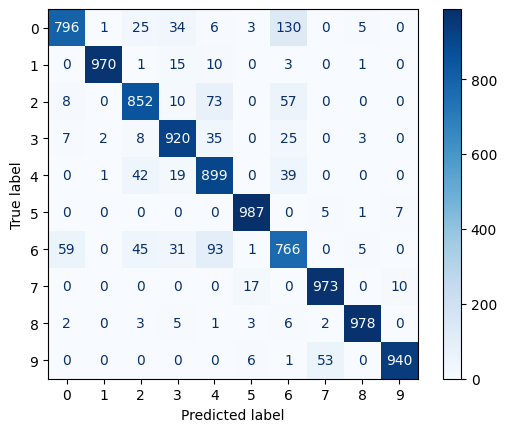

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict class labels
y_pred_CNN1_test1 = np.argmax(model_CNN1.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_CNN1_test1 )

# Display
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')


more leayers

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_CNN1_test1))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.89      0.92      0.90      1000
           4       0.80      0.90      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.75      0.77      0.76      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



sigmoid activation for convolution layer and then use relu for linear fully connected layers later is not good, around 0.86 accuracy for test set

more leayers

In [19]:
from tensorflow.keras import regularizers

In [25]:
model_CNN2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(30,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001)),# the 32 filters are independent; each applies a 3×3 kernel over the 28×28 image (every row and col), producing 32 feature maps
     #padding='same' adds zero-paddings to preserve the 28×28 size, so did not ignore edge
    # regularizers.l2(0.001),# add regularization to prevent overfit

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),

    Conv2D(15,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.001),),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),# x*=x*Ber (p), p=drop out rate,
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(120,activation='relu',kernel_regularizer=regularizers.l2(0.001),),# reduce dim more than 1st model since we do max pooling twice

    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),


    Dense(10,activation='softmax')
])



In [26]:
from tensorflow.keras.optimizers import Adam
model_CNN2.compile(optimizer=Adam(learning_rate=1e-4),# import adam, the learning rate does not belongs to the comile method, importantt, important
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
model_CNN2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(30,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001)),# the 32 filters are independent; each applies a 3×3 kernel over the 28×28 image (every row and col), producing 32 feature maps
     #padding='same' adds zero-paddings to preserve the 28×28 size, so did not ignore edge
    # regularizers.l2(0.001),# add regularization to prevent overfit

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),

    Conv2D(15,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.001),),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),# x*=x*Ber (p), p=drop out rate,
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(120,activation='relu',kernel_regularizer=regularizers.l2(0.001),),# reduce dim more than 1st model since we do max pooling twice

    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),


    Dense(10,activation='softmax')
    ])

In [27]:
start_t_CNN2 = time.time()
model_CNN2.fit(X_tr, y_tr, epochs=5)
end_t_CNN2 =time.time()
CNN_train_t2=end_t_CNN2-start_t_CNN2

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.6972 - loss: 1.1848
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.8559 - loss: 0.6668
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8762 - loss: 0.5865
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.8848 - loss: 0.5446
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.8938 - loss: 0.5079


reducing layer, reducing regularization, and more eporch

In [38]:
model_CNN2.evaluate(X_val,  y_val, verbose=2)

313/313 - 3s - 11ms/step - accuracy: 0.8890 - loss: 0.5241


[0.5240810513496399, 0.8889999985694885]

In [50]:
print(CNN_train_t2)

385.17985701560974


In [54]:
model_CNN3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(30,(3,3),padding='same'),

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.1),
    MaxPooling2D((2,2)),

    Conv2D(15,(3,3), padding='same'),# reducing number of filters (or kernels).
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.07),
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(120,activation='relu',kernel_regularizer=regularizers.l2(0.001)),# reduce dim more than 1st model since we do max pooling twice

    Dense(55,activation='relu',kernel_regularizer=regularizers.l2(0.001)),


    Dense(10,activation='softmax')
    ])

In [55]:
model_CNN3.compile(optimizer=Adam(learning_rate=1e-4),# import adam, the learning rate does not belongs to the comile method, importantt, important
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

Q: why each eporch later lik 7/8, accuracy will drop as you run more data like from 0.902 to 0.91 then to 0.905 30 words

That’s normal small fluctuation — mini-batch training updates weights stochastically, so accuracy oscillates.
Also, learning-rate decay or over-regularization can cause slower improvement or slight drops after convergence.

In [56]:
start_t_CNN3 = time.time()
model_CNN3.fit(X_tr, y_tr, epochs=15)
end_t_CNN3 =time.time()
CNN_train_t3=end_t_CNN3-start_t_CNN3

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 37ms/step - accuracy: 0.6894 - loss: 1.1961
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.8626 - loss: 0.6271
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.8813 - loss: 0.5495
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8925 - loss: 0.5077
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9000 - loss: 0.4694
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9046 - loss: 0.4419
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.9095 - loss: 0.4223
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9128 - loss: 0.4005
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9141 - loss: 0.3929
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.9202 - loss: 0.3704
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.9228 - loss: 0.3545
Epoch 12

In [57]:
model_CNN3.evaluate(X_val,  y_val, verbose=2)

313/313 - 10s - 31ms/step - accuracy: 0.9119 - loss: 0.3603


[0.36033761501312256, 0.911899983882904]

In [58]:
print('fine-tuned CNN (two conv and max pooling) trining time is:',CNN_train_t3)

fine-tuned CNN (two conv and max pooling) trining time is: 975.9813241958618


In [60]:
from sklearn.metrics import classification_report
y_pred_CNN1_test3=np.argmax(model_CNN3.predict(X_test), axis=1)

print(classification_report(y_test, y_pred_CNN1_test3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.88      0.87      1000
           3       0.88      0.94      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.79      0.66      0.72      1000
           7       0.91      0.99      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



already reach ralatively stable train around 92% for 11-15 eporch. But test just aroudn 0.9, validate 0.91. More generalized than previous model1. Maybe I should not use two conv+max pooling. go back for one.

In [61]:
model_CNN4 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(32,(3,3),padding='same'),

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.1),
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(180,activation='relu',kernel_regularizer=regularizers.l2(0.001)),# reduce dim more than 1st model since we do max pooling twice

    Dense(90,activation='relu',kernel_regularizer=regularizers.l2(0.001)),


    Dense(10,activation='softmax')
    ])

In [62]:
model_CNN4.compile(optimizer=Adam(learning_rate=1e-4),# import adam, the learning rate does not belongs to the comile method, importantt, important
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
start_t_CNN4 = time.time()
model_CNN4.fit(X_tr, y_tr, epochs=9)
end_t_CNN4 =time.time()
CNN_train_t4=end_t_CNN3-start_t_CNN4

Epoch 1/9
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.9342 - loss: 0.3342
Epoch 2/9


In [64]:
model_CNN4.evaluate(X_val,  y_val, verbose=2)

313/313 - 3s - 10ms/step - accuracy: 0.9055 - loss: 0.4192


[0.41922569274902344, 0.9054999947547913]

In [65]:
print('fine-tuned CNN (one conv and max pooling) trining time is:',CNN_train_t4)

fine-tuned CNN (one conv and max pooling) trining time is: -500.6514985561371


In [66]:
y_pred_CNN1_test4=np.argmax(model_CNN4.predict(X_test), axis=1)

print(classification_report(y_test, y_pred_CNN1_test4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.88      0.85      1000
           3       0.90      0.90      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.75      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.94      0.99      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



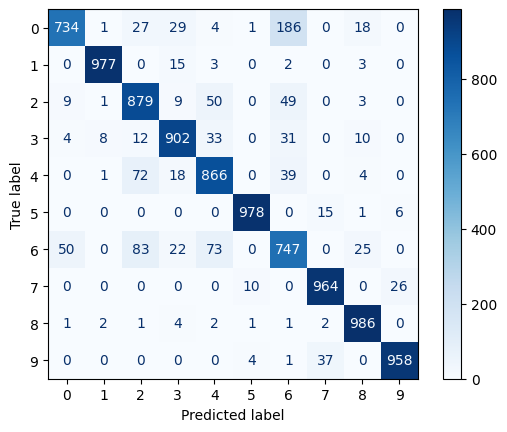

In [68]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_4 = confusion_matrix(y_test, y_pred_CNN1_test4 )

# Display
ConfusionMatrixDisplay(confusion_matrix=cm_4).plot(cmap='Blues')

0 and 6 are commonly not predicting well. class 0 mistakenly as 6

# transfer learning

VGG16, ResNet50,MobileNetV2 are available in tf.keras.applications

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg16

In [ ]:
vgg_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),weights='imagenet',include_top=False)
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

too big pramater set

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
MobileNetV2_model = MobileNetV2(input_shape=(224, 224, 3),# origianl: shape=(224, 224, 3)
                             include_top=False, # Exclude the classification head
                             weights='imagenet')
#base_model = tf.keras.applications.Xception(weights=None, input_shape=(28,28,3), include_top=False)
#base_model .summary()




In [ ]:
#MobileNetV2_model .summary()

0

In [ ]:
base_model_truncated=tf.keras.Model(inputs=MobileNetV2_model.input, outputs=MobileNetV2_model.get_layer('block_3_expand').output)


only get params until block 3 through above history to reduce parameters

In [ ]:
base_model_truncated.count_params()


20464

In [ ]:
base_model_truncated.trainable = True

In [ ]:
from tensorflow.keras import layers, models


In [ ]:

#inputs = tf.keras.Input(shape=(224, 224, 3))# should map 28*28 to that trget one, since they have nice pre-trained params
#x = base_model_truncated(inputs, training=False) # Ensure the base model runs in inference mode
#x = layers.GlobalAveragePooling2D()(x) # reduce dim to keep key features since our model is smaller data set
#x = layers.Dense(64, activation='relu')(x)
#outputs = layers.Dense(10, activation='softmax')(x) # num_classes is your target class count
#model = models.Model(inputs, outputs)

In [ ]:
import gc
tf.keras.backend.clear_session()
gc.collect()

0

In [ ]:
inputs = tf.keras.Input((224,224,3))
x = base_model_truncated(inputs)   # 4D: (H,W,C)??? what damm this layer, have issues
x = layers.Conv2D(64,3,padding='same',activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.GlobalAveragePooling2D()(x)             # → 2D
x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # or 'categorical_crossentropy'
                  metrics=['accuracy'])


In [ ]:
#X_tr_resized = tf.image.resize(X_tr, [224,224])
#X_val_resized = tf.image.resize(X_val, [224,224])


above let my laptop CPU crash, so change to cv2 to resize and then convert to tensorflow version

In [ ]:
print(X_tr[0].shape)
print(X_tr.shape)


(28, 28, 1)
(50000, 28, 28, 1)


In [ ]:
X_tr_subset= X_tr[:1000]


In [ ]:
X_tr_subset_rgb=tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_tr_subset))  #convert to rgb data first to match the target

In [ ]:
X_tr_resized_subset_rb = tf.image.resize(X_tr_subset_rgb, [224,224])

In [ ]:
X_val_subset= X_val[:1000]

In [ ]:
X_val_subset_rgb=tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_val_subset))

In [ ]:
X_val_resized_subset_rgb =tf.image.resize(X_val_subset_rgb, [224,224])

In [ ]:
#import cv2, numpy as np
#X_tr_2 = np.array([cv2.resize(img, (224,224)) for img in X_tr])


In [ ]:
y_tr_subset=y_tr[:1000]
y_val_subset=y_val[:1000]

In [ ]:
X_tr_resized_subset_rb = tf.cast(X_tr_resized_subset_rb, tf.float32)
y_tr_subset = tf.cast(y_tr_subset, tf.int64)



In [ ]:
X_tr_resized_subset_rb = np.array(X_tr_resized_subset_rb, dtype="float32")
y_tr_subset = np.array(y_tr_subset, dtype="int64")


In [ ]:
print(len(X_val_subset_rgb), len(y_val_subset))


1000 1000


In [ ]:
print(X_tr_resized_subset_rb.shape)
print(X_tr_resized_subset_rb.shape)


(1000, 224, 224, 3)


In [ ]:
model.fit(
    X_tr_resized_subset_rb, y_tr_subset,
    validation_data=(X_val_subset_rgb, y_val_subset),
    epochs=1
)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3657 - loss: 2.0899

ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 28, 28, 3)

In [ ]:
print(model.input_shape)         # should show (None,224,224,3)
print(type(model))


(None, 224, 224, 3)
<class 'keras.src.models.functional.Functional'>


In [ ]:
y_pred_transfer1 = np.argmax(model.predict(X_test), axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_transfer1 ))